In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models

In [3]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2021
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)

## EDA

In [4]:
DATASET_PATH = os.path.join('/content/drive/MyDrive/모의경진대회/교통 물류 통행량 시계열 예측/data/train')
DATASET_PATH2 = os.path.join('/content/drive/MyDrive/모의경진대회/교통 물류 통행량 시계열 예측/data/test')

In [149]:
train_df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train_df

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [42]:
valid_df = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
valid_df

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,2859,1549,12036,3225,7324,2789,5907,11097,2641,5396,20709,20787,8429,3184,2055,1430,27798,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,1940,1133,8316,2096,4423,1778,4028,7105,1773,3532,13160,13035,5459,1741,1230,859,16145,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,1425,1211,6623,2168,3693,1642,3376,5290,1268,3085,10377,10477,4610,1070,967,752,12335,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,1678,1748,7857,2593,4378,1637,4389,6325,1642,3983,11258,13014,5047,1289,1028,1129,14189,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,2531,2304,12197,4013,7034,3207,6514,13898,3185,8286,18038,27303,9132,2202,1599,1609,32976,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [107]:
test_df = pd.read_csv(os.path.join(DATASET_PATH2, 'test.csv'))
test_df

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,12596,3060,7383,2958,5829,11297,2890,5694,19553,18919,9907,2912,1884,1112,28189,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,1839,1502,7741,2132,4790,1743,4296,6781,1752,3651,12454,11849,6292,1750,1118,703,16683,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,1360,1233,6475,2098,3965,1345,3957,4762,1250,3199,9640,9392,4961,1104,1004,485,11934,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,1671,1800,7720,2133,4083,1501,3992,6202,1505,4459,10802,11664,6015,1132,1061,851,13458,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,2574,2384,12018,3502,6430,2882,5957,11987,3176,9054,16490,23479,10676,1945,1520,1420,31698,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,20200531,20,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,20200531,21,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,20200531,22,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


## 데이터 전처리
* 할 것!
1. 요일별로 바꿔서 요일 별 특성 확인하기
2. 각 도로별로 나눠서 도로별 특성 확인하기

In [150]:
#train_data 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [151]:
# # 일별로 나타내기
# train_df2 = train_df.groupby("날짜").sum()
# train_df2 = train_df2.drop(["시간"],axis=1).reset_index(inplace=False)
# train_df2

,날짜,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,5006706,1607813,216087,481235,182757,115300,2316399,130114,516721,164605,1077210,328368,875554,332798,821729,965420,151713,507011,1163074,2126998,1420891,669691,494287,244083,2131684,108535,234214,553083,270659,139350,334162,66950,267826,162546,366594
1,20200102,5390294,1638834,165724,403004,152083,104069,2227595,113220,263870,149250,1045965,295535,449500,261442,659807,1015629,166391,527598,1211891,1828466,1265277,326095,291986,163767,2572271,123915,263751,695526,348094,103901,339314,69792,311813,172577,346672
2,20200103,6079899,1777802,190067,473078,166017,122349,2499240,121370,294028,172253,1196158,332920,539675,294877,725243,1141802,185427,595687,1405572,2019952,1451357,359850,315100,182962,2673751,144580,272906,677219,371390,120859,392128,72021,349457,190175,377754
3,20200104,5725885,1743939,193869,510606,179314,118473,2597776,124013,379395,168330,1243317,333022,556810,320065,796573,1126244,185047,550144,1272515,2089279,1256110,525586,391430,202141,2550240,138880,266273,569333,330755,117240,388329,74954,320370,178774,372421
4,20200105,5180150,1545929,172876,483723,150186,107015,2355430,113277,366770,151876,1082398,289692,565761,287022,782302,998284,190490,473791,1195483,1822272,1085878,464135,336850,185116,2163717,114246,239678,507174,272263,126264,336935,62068,270039,148609,312512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,148142,1131472,276708,469783,307559,550532,1102165,222063,577543,1175811,1696322,1133109,253335,241679,147368,2960542,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
134,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,151759,1154121,280189,493558,295342,600963,1094543,233360,597737,1206636,1728193,1174470,270302,245836,158998,2986004,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
135,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,162226,1190904,288189,535793,319649,632159,1088795,224369,628789,1283137,1784735,1301060,336896,270723,150564,2656727,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983
136,20200516,5719070,1834329,206927,532645,196345,146078,2805512,120483,373552,161697,1355929,314055,549172,364988,702312,1168268,246744,648842,1140690,1942206,1395103,501204,328912,185931,2726927,137992,290508,607064,339408,159402,424661,72791,319778,218720,378043


### 결측치 찾기

In [174]:
# 날짜형식이 이상해져서 날짜를 따로 생성 해주려고함.
# 2020-01-01 ~ 2020-05-17
start_date = pd.to_datetime('2020-01-01') ## 시작 날짜
end_date = pd.to_datetime('2020-05-17 23:00:00') ## 마지막 날짜
dates = pd.date_range(start_date,end_date,freq='h')
dates
# 31 29 31 30 17
#744 696 744 720 = 3312
#결론적으로 train은 3312개의 데이터가 있어야함!

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-05-17 14:00:00', '2020-05-17 15:00:00',
               '2020-05-17 16:00:00', '2020-05-17 17:00:00',
               '2020-05-17 18:00:00', '2020-05-17 19:00:00',
               '2020-05-17 20:00:00', '2020-05-17 21:00:00',
               '2020-05-17 22:00:00', '2020-05-17 23:00:00'],
              dtype='datetime64[ns]', length=3312, freq='H')

In [171]:
#시간이 빠진 데이터 개수 (결측치 수)
3312 - 3279

33

In [175]:
#날짜와 시간을 뽑아 날짜단위로 groupby
time_df = train_df[["날짜", "시간"]]
time_df2 = time_df.groupby("날짜").sum().reset_index(inplace=False)
time_df2

,날짜,시간
0,20200101,276
1,20200102,276
2,20200103,276
3,20200104,276
4,20200105,276
...,...,...
133,20200513,276
134,20200514,276
135,20200515,276
136,20200516,276


In [176]:
#시간 컬럼을 보고 시간의 합이 다른 숫자는 결측치가 있는거로 판단했음.
time_df3 = time_df2[time_df2["시간"] < 276]
time_df3

,날짜,시간
59,20200229,78
89,20200330,1


In [177]:
#결측치(11개)
#토요일
da = train_df[train_df["날짜"]== 20200229] 
da

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
1416,20200229,0,70783,12481,1074,2920,1020,956,26231,677,1538,1264,12739,2632,4420,2020,5216,9242,1399,4006,17911,19245,6522,2564,1655,649,33515,613,2540,7873,5389,1026,3447,401,1706,1381,1872
1417,20200229,1,51754,8195,694,2141,617,703,19200,593,1224,1182,9213,2002,3347,1716,4172,6880,1096,3158,13492,14138,4941,1468,1075,567,22342,440,1545,5193,3925,866,2685,231,1240,1014,1428
1418,20200229,2,41031,7143,641,1936,597,595,14281,416,1127,935,7077,1872,3038,1710,3908,5830,913,2729,11316,11240,4552,1067,850,460,16738,372,1499,4047,2893,800,2313,237,1107,848,1307
1419,20200229,3,37688,7626,624,1742,420,500,13834,442,1249,1252,6565,1598,2881,1203,4085,5467,869,3477,10126,11589,4494,1109,785,586,14596,343,1424,3915,2283,636,2083,201,1257,807,1181
1420,20200229,4,46899,11199,781,2720,651,653,18429,609,1651,1236,7119,2281,3455,1668,4595,6909,1249,4582,11732,16410,5949,1820,1094,863,19631,442,2146,5882,2999,705,2737,391,1888,1163,1797
1421,20200229,5,80770,20795,1717,4251,1385,1018,38419,1110,2344,1422,11476,3601,4843,2867,6749,13788,3153,8670,15730,34010,11375,2411,1904,1527,54005,944,4123,13280,7195,912,3920,542,3485,2561,4000
1422,20200229,6,126497,35718,3163,6909,3872,1840,57764,1882,4335,1983,20971,4997,6889,4431,9901,24207,5710,14427,21414,55762,21321,4205,3587,3265,84433,2492,7496,19922,10239,1737,5548,895,7021,4730,8105
1423,20200229,7,156874,51431,4414,10409,5324,3191,72190,2940,6607,3434,31779,6462,8555,6317,14715,30339,5901,17341,26256,64036,33172,6197,6338,4227,88089,4516,10094,22121,11850,2424,7812,1407,10988,6980,11540
1424,20200229,8,189865,57387,5271,12740,5784,3666,100060,3474,7473,4234,39886,7702,9897,8178,18864,33339,6009,18842,30299,73396,36920,9958,8363,4464,94748,4062,10906,26327,15156,3405,10854,1697,11589,7241,12127
1425,20200229,9,229212,70651,7700,15575,7699,4894,110886,4191,9372,5591,51377,10538,13452,11898,24836,43816,8222,23023,38287,90570,45636,15229,10356,6143,118904,4950,12192,30064,16810,4651,13805,1932,11631,8396,14127


In [178]:
#결측치(22개)
#월요일
da2 = train_df[train_df["날짜"]== 20200330] 
da2

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
2125,20200330,0,38243,7403,585,1695,426,351,13476,430,1304,820,6079,1633,2967,1271,2338,5138,1004,2456,9490,8930,3668,1344,903,563,13389,330,1257,2574,2011,521,1662,139,950,761,1130
2126,20200330,1,20378,3927,313,1060,315,223,7095,287,729,505,3129,1031,1716,692,1484,2760,685,1546,5564,4805,2026,680,508,289,6331,149,746,1220,1040,348,980,83,602,358,685


#### 결측치 중에서 비어있는 시간대를 전 주 시간대 데이터로 채워 넣어 볼 생각!
-> Prophet 모델을 쓸 경우 Nan으로 채워도 된다고 함.

In [213]:
#2월29일 비어있는 부분을 2월22일 데이터로 채우기
ca = train_df[train_df["날짜"]== 20200222].reset_index(drop=True)
ca = ca.loc[13:].reset_index(drop=True)
ca = ca.replace({"날짜" : 20200222}, 20200229)
ca

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200229,13,326721,100711,12738,24758,11470,7876,156137,6655,15112,9054,77625,17929,27866,19873,44587,64401,12679,32691,64982,139588,84244,43480,28543,10209,151963,7030,16061,41804,19915,7696,22307,2658,13753,12214,20419
1,20200229,14,333598,105748,14014,26067,11986,8452,166283,6876,15301,9225,81535,18689,29007,21853,46114,68591,14765,35213,67904,145291,86159,43326,30173,10345,150552,7205,15994,42728,19020,8455,24686,2648,13659,12353,20286
2,20200229,15,338220,105659,13729,26807,11643,8003,167718,6996,15887,9503,84973,18072,29732,22235,47390,73875,15043,36350,68442,147018,84854,40695,28106,10510,160174,7152,15885,38562,19952,8628,25617,2836,13758,12550,21102
3,20200229,16,337509,104597,13858,25892,11999,8503,165466,7058,15279,9499,83173,18076,28823,21738,45073,74660,15444,34813,69262,138760,82460,38415,24879,9412,169419,7308,15877,45714,20642,8080,25355,3040,14015,12331,21015
4,20200229,17,329964,98249,12193,23330,11926,8096,149645,6608,16159,8406,76948,16761,24721,19460,42567,67925,15111,32693,62250,129910,77408,28917,22489,9158,173733,7356,15220,46121,21235,7288,23388,3111,14413,12524,20661
5,20200229,18,278775,77086,9292,17980,9754,6166,123700,5291,12313,6015,62846,12888,19630,14568,34347,52847,11060,24907,52034,106096,58950,23951,16467,7181,147264,5329,12094,37366,18382,5977,17361,2417,11342,9523,15394
6,20200229,19,222919,56316,6385,12665,6759,4053,95303,4047,9023,4500,48358,9525,14643,11107,23430,39077,8693,18243,41232,81449,43323,18434,10842,4677,113271,3722,10070,27116,14619,5077,12858,1444,7844,7012,10479
7,20200229,20,185726,43961,4671,9013,4992,2970,80441,3275,6428,3889,39461,7211,10878,8216,18268,30105,7188,14155,33235,65373,33804,13771,8448,3804,97782,3034,8446,22840,13472,3751,10309,1113,6246,5458,8167
8,20200229,21,165017,34805,3261,6686,3719,2119,64354,2544,5110,2602,31267,5491,8216,6326,13083,24326,5386,10283,26395,53973,25815,9599,5481,2756,90444,2241,7290,21253,12762,3183,7682,851,4210,4671,6522
9,20200229,22,126206,24344,2170,4972,2816,1542,48819,1879,3096,1831,21839,4098,5969,4277,8981,15293,3770,7044,19338,38049,18387,6007,3621,1928,67886,1588,4785,15820,10995,2101,5562,588,2978,3392,4418


In [216]:
#3월30일 비어있는 부분을 3월23일 데이터로 채우기
ba = train_df[train_df["날짜"]== 20200323].reset_index(drop=True)
ba = ba.loc[2:].reset_index(drop=True)
ba = ba.replace({"날짜" : 20200323}, 20200330)
ba

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200330,2,34928,8220,735,1926,409,652,12036,378,1171,1424,6036,2150,3589,1315,3286,4836,1191,3340,9483,8985,4673,1126,838,544,8857,323,1268,2516,1832,684,1814,136,1047,808,1392
1,20200330,3,42126,10918,609,2314,384,822,14999,491,1706,1734,7149,2603,4035,1475,3993,5927,1325,4297,10538,11623,5499,1345,938,927,10593,312,1413,2924,1872,721,2538,234,1307,928,1792
2,20200330,4,74959,19376,1205,4172,821,1168,31455,925,1938,2494,11606,3698,6201,2723,6389,11448,2603,7929,17150,22782,9832,1872,1385,1800,23867,571,2683,7195,3858,1304,3978,376,2619,1813,3313
3,20200330,5,175651,41680,3144,8057,2520,1903,76889,2057,4426,3163,22661,5794,10546,6135,11033,30553,8303,17696,29010,62358,22972,3833,3289,3169,86048,1734,7252,21429,12460,2391,7487,824,5841,4597,8095
4,20200330,6,307846,80781,7458,14213,7273,4347,114286,4408,9059,5016,47000,9374,17307,12985,19104,55037,11969,29081,44353,96218,48364,7455,6535,7778,147999,5483,15683,38355,22624,4223,16341,2102,15847,10709,18348
5,20200330,7,368977,113644,11921,20831,13034,7265,129236,6827,14677,7589,77945,12685,21788,20603,28585,71518,14331,39057,54387,115369,76593,10422,11826,11340,176764,11505,20312,48076,26072,5427,25980,3960,27386,16478,27077
6,20200330,8,332228,103174,11097,21911,12956,7512,125203,7016,13602,7674,71459,13893,21476,18209,29683,66549,13833,34947,51740,109343,73993,10772,14191,9108,167634,9090,18184,42323,24073,4897,23719,4354,22895,15827,24478
7,20200330,9,293961,88237,9300,19960,9615,5976,125554,5948,12890,7426,63425,12423,20977,15089,27578,59908,12328,33327,54893,99831,63503,11800,12668,8917,157445,7320,15237,37520,20091,5110,19754,2508,17431,12536,20529
8,20200330,10,304013,98189,11259,23523,10111,6666,134889,6247,14570,9901,67909,16169,25740,16209,33609,62404,13263,35236,65310,106574,66602,14727,13694,9692,145492,8018,15438,34524,18808,6814,20929,2278,18357,12273,20665
9,20200330,11,308435,96961,11085,24608,9320,6387,137491,5973,14908,9867,66336,17637,27703,16860,33371,62348,13977,35182,68126,102042,65471,20875,15837,9667,138132,7744,14886,31638,17036,6868,20373,2237,16637,12496,20941


In [305]:
#원본데이터와 합치기
train_df2 = pd.concat([train_df, ca, ba]).sort_values(["날짜","시간"],ascending=True).reset_index(drop=True)
train_df2

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3308,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3309,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3310,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [306]:
train_df2

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3308,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3309,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3310,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [307]:
#따로 쓰기 위해 데이터 저장
# train_df2.to_csv('train2.csv', index=False)

### 1. 요일별로 바꿔서 요일 별 특성 확인하기
* 결측치를 다채워줬으니 요일 컬럼을 생성하여 요일별로 나타내어주려고 함!

In [303]:
#다시 위에 지정해준 코드를 써서 요일별 컬럼 생성
date_df = dates.to_frame(index=False)
date_df.rename(columns={0:"날짜"}, inplace=True)
date_df

,날짜
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
3307,2020-05-17 19:00:00
3308,2020-05-17 20:00:00
3309,2020-05-17 21:00:00
3310,2020-05-17 22:00:00


In [304]:
#원본과 합치기
train_df2 = train_df2.drop(["날짜","시간"], axis=1)
train_df2 = pd.concat([date_df, train_df2], axis=1)
train_df2

,날짜,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,2020-01-01 01:00:00,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,2020-01-01 02:00:00,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,2020-01-01 03:00:00,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,2020-01-01 04:00:00,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-05-17 19:00:00,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3308,2020-05-17 20:00:00,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3309,2020-05-17 21:00:00,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3310,2020-05-17 22:00:00,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [268]:
#합친 데이터프레임 확인
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3312 non-null   datetime64[ns]
 1   10      3312 non-null   int64         
 2   100     3312 non-null   int64         
 3   101     3312 non-null   int64         
 4   120     3312 non-null   int64         
 5   121     3312 non-null   int64         
 6   140     3312 non-null   int64         
 7   150     3312 non-null   int64         
 8   160     3312 non-null   int64         
 9   200     3312 non-null   int64         
 10  201     3312 non-null   int64         
 11  251     3312 non-null   int64         
 12  270     3312 non-null   int64         
 13  300     3312 non-null   int64         
 14  301     3312 non-null   int64         
 15  351     3312 non-null   int64         
 16  352     3312 non-null   int64         
 17  370     3312 non-null   int64         
 18  400     

In [272]:
#요일 컬럼 생성
train_df2["요일"] = train_df2["날짜"].dt.day_name()
train_df2

,날짜,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000,요일
0,2020-01-01 00:00:00,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799,Wednesday
1,2020-01-01 01:00:00,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010,Wednesday
2,2020-01-01 02:00:00,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388,Wednesday
3,2020-01-01 03:00:00,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686,Wednesday
4,2020-01-01 04:00:00,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-05-17 19:00:00,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194,Sunday
3308,2020-05-17 20:00:00,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962,Sunday
3309,2020-05-17 21:00:00,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031,Sunday
3310,2020-05-17 22:00:00,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889,Sunday


In [278]:
#요일 별 교통량 시각화
day_df = train_df2.groupby("요일").sum().reset_index(inplace=False)
day_df

,요일,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,Friday,123870787,35129153,3864217,9041065,3355482,2516189,52975684,2294409,5547330,3455176,25348560,6777705,10749139,6545140,14069376,23352372,4256470,12293437,26675071,40330804,27180968,7159023,5815000,3356930,56964070,2831487,5626466,14120665,7172638,2602464,7975932,1245780,6390205,4200522,7311549
1,Monday,106219418,29633795,3008167,7140368,2850620,1963472,42457138,1931306,4554267,2726351,20674904,5241485,8256855,5206951,10744029,19304162,3574198,10218233,21334530,33584130,20720508,5019097,4425885,2795017,51467612,2271131,5006445,12848510,6585389,1894211,6460278,1104469,5617442,3674215,6307705
2,Saturday,112478221,33927254,3972465,9691422,3603422,2574744,54149632,2256111,6821324,3192609,25286127,6692295,10347779,6770912,14470367,22119728,4199316,11525397,22227200,41164764,27390694,10284446,7008593,3577388,53552820,2697834,5320776,12784627,6378617,2993198,7683208,1279624,5759107,3893010,7016794
3,Sunday,101899630,30016995,3486085,9041325,3097691,2276733,48628324,2047496,6626089,2906520,22295870,6209759,10148344,6033193,14109109,19353531,3800127,9681807,21066733,35759468,24011048,9424563,6130162,3196311,44239449,2206883,4578216,9763066,5087562,2842404,6698975,1068698,4724220,3175774,5993526
4,Thursday,112455594,32119947,3295911,7893865,3142925,2200086,46639969,2087504,4852932,3010245,22493334,5905924,9111749,5688904,11880979,20849069,3764538,10865370,23829276,36141271,23072369,5134525,4733501,2972810,55035548,2459277,5410304,13988749,7170972,2152512,6970015,1189932,6025887,3926038,6785893
5,Tuesday,102371434,29174831,2918992,6998400,2866483,1925267,40347608,1898282,4347973,2635962,20071905,5005252,7902049,4941581,10006755,18415732,3398903,9778861,21167951,32005440,19664869,4286787,4070383,2691980,50866680,2217055,4985127,12853207,6751935,1725615,6142991,1106037,5612515,3648983,6186303
6,Wednesday,108403719,30953750,3126276,7537175,3064594,2051174,43761420,2035370,4930338,2801588,21330828,5406599,8875736,5347075,10843233,19903021,3666426,10281648,22409569,34676233,21457982,4975417,4561636,2948611,53748249,2360129,5241260,13706676,7035075,1912770,6537532,1141914,5936386,3828368,6640089


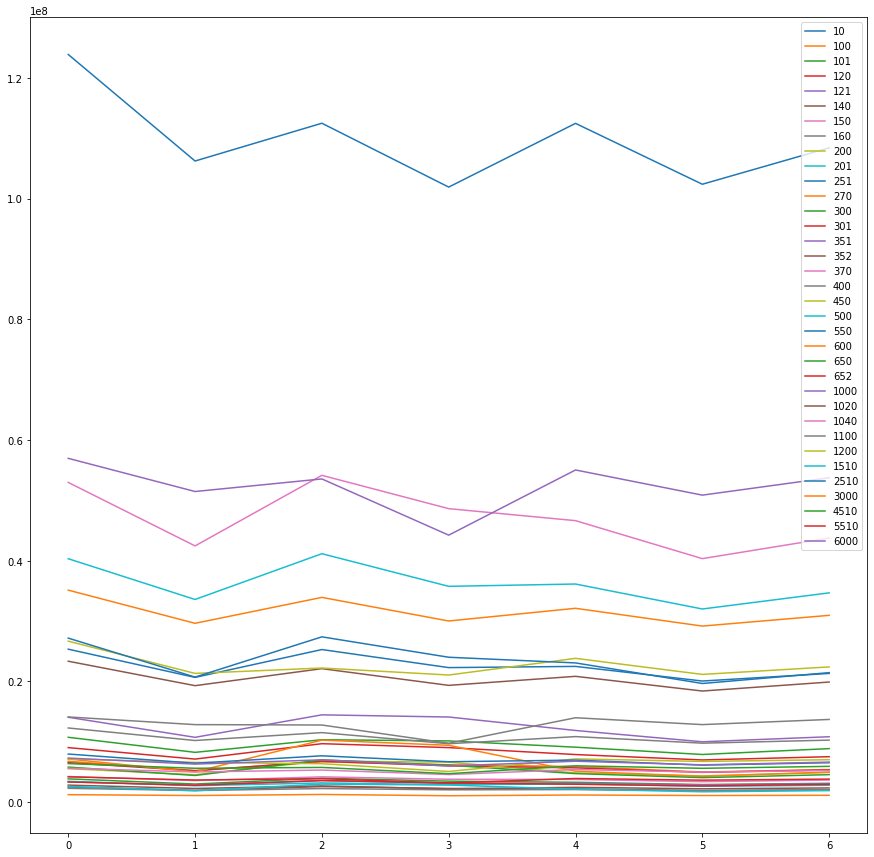

In [297]:
import seaborn as sns
day_df.plot(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd08eb93d0>,
      dtype=object)

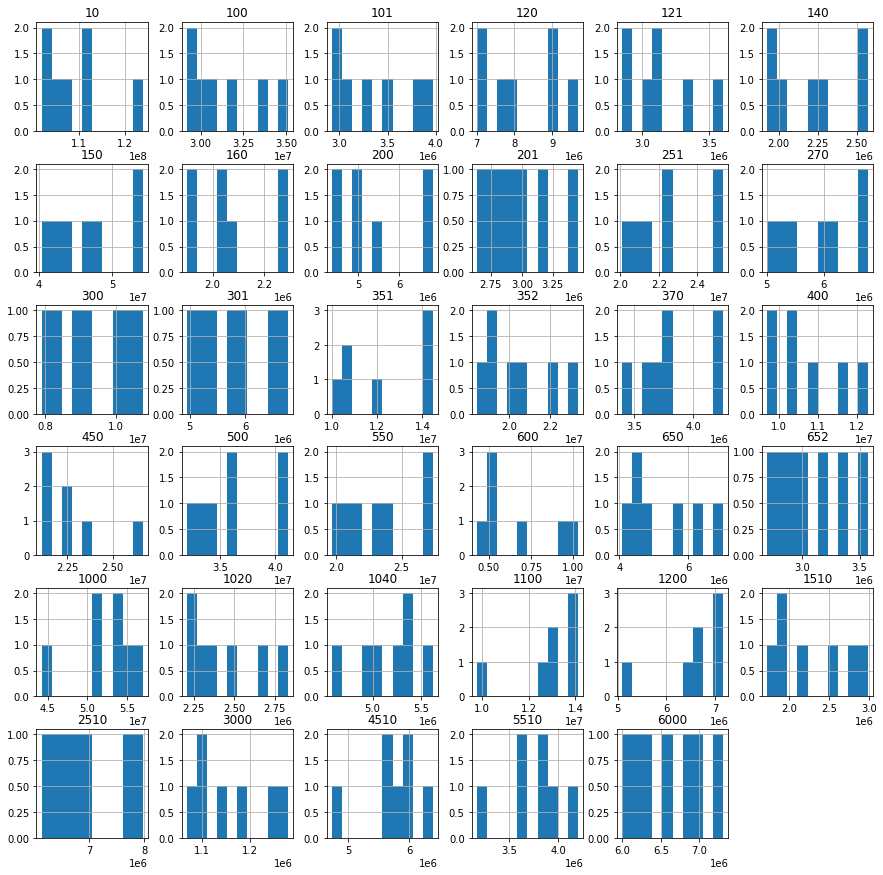

In [300]:
day_df.hist(figsize=(15,15))

## Dataloader
* 한 칼럼에 대한 7일(168행) 데이터를 input_data, 뒤따르는 7일 데이터를 output_data로 반환합니다.
* 도로별 차이를 두지 않고 모든 도로를 동일한 타입의 데이터로 취급합니다.
* 모든 csv 파일의 마지막 168행은 예측해야하는 값이므로 input으로 들어가지 않습니다.

In [8]:
class CustomDataset(data.Dataset):      # torch.utils.data.Dataset 클래스의 상속 클래스 CustomDataset class 생성. 상속 클래스 생성시 __init__, __getitem__, __len__함수는 기본적으로 정의해줘야 함.
    
    def __init__(self, root, seq_len, batch_size=64, phase='train'):      # 데이터 로드 단계에 사용될 여러 변수들을 'self.변수명'의 형태로 지정해두는 함수
        
        self.root = root      # CustomDataset 객체 생성 시 데이터 경로 앞부분(공통 부분)을 root로 입력받아 저장
        self.phase = phase      # CustomDataset 객체 생성 시 데이터 경로 뒷부분(train/validate/test)을 phase로 입력받아 저장
        self.label_path = os.path.join(self.root, self.phase + '.csv')      # 데이터 전체 경로 생성
        df = pd.read_csv(self.label_path)      # 생성한 데이터 전체 경로로부터 데이터 로드
        
        self.seq_len = seq_len * 24      # 일 단위 기간을 입력 받은 후 시간 단위 기간으로 변환하여 저장
        self.batch_size = batch_size
        self.labels = {}
        
        timestamps = [(i, j) for (i, j) in zip(list(df['날짜']), list(df['시간']))]      # 날짜와 시간 정보가 튜플로 들어 있는 리스트 생성
        categories = df.columns.values.tolist()[2:]      # 도로명 column list 생성

        input_data = []
        output_data = []

        for t in range(len(timestamps)):
            temp_input_data = []
            temp_output_data = []
            for col in categories:
                road = df[col].tolist()
                inp = [float(i) for i in road[t:t+self.seq_len]]      # input 데이터 시계열 구간 설정
                outp = [float(j) for j in road[t+self.seq_len:t+2*self.seq_len]]      # output 데이터 시계열 구간 설정
                temp_input_data.append(inp) 
                temp_output_data.append(outp)
            input_data.append(temp_input_data)
            output_data.append(temp_output_data)
            
# input_data : [[첫번째 input 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 input 기간 동안의 35번째 도로의 통행량 list], ...,
#               [마지막 input 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 input 기간 동안의 35번째 도로의 통행량 list]]
# output_data : [[첫번째 output 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 output 기간 동안의 35번째 도로의 통행량 list], ...,
#                [마지막 output 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 output 기간 동안의 35번째 도로의 통행량 list]]
        
        self.labels['timestamp'] = timestamps
        self.labels['category'] = categories
        self.labels['input'] = input_data
        self.labels['output'] = output_data

    def __getitem__(self, index):      # index를 가지고 데이터를 하나씩 불러올 수 있게 하는 함수

#         데이터 내 index가 부여되는 형태

#                 | road_1    road_2    ...  road_35
#                -------------------------------------
#         time_1  | index_0   index_1   ...  index_34
#         time_2  | index_35  index_36  ...  index_69

        row = index // 35      # index를 35(도로수)로 나눈 몫  ex) 71//35 -> 2
        col = index % 35      # index를 35(도로수)로 나눈 나머지  ex) 71%35 -> 1

        timestamp = self.labels['timestamp'][row]      # (날짜, 시간) 튜플이 들어있는 list에서 row번째 시점에 해당하는 튜플
        category = self.labels['category'][col]      # 도로명 column list에서 col번째 도로에 해당하는 element
        
        input_data = torch.tensor(self.labels['input'][row][col])      # input_data list에서, row번째 시점의 col번째 도로 교통량 정보

        if self.phase != 'test':
            output_data = torch.tensor(self.labels['output'][row][col])
        else:
            output_data = []

        return timestamp, category, (input_data, output_data)

    def __len__(self):      # getitem 함수를 통해 데이터를 불러오려면,전체 index 길이를 알아야 한다.
        return (len(self.labels['timestamp']) - (self.seq_len * 2) + 1) * 35      # 특정 시점이 아닌 특정 기간을 하나의 data 단위로 설정하면, 전체 샘플 수는 감소함을 반영 


def data_loader(root, phase='train', batch_size=64, seq_len=7, drop_last=False):
    if phase == 'train':
        shuffle = True
    else:
        shuffle = False

    dataset = CustomDataset(root, seq_len, batch_size, phase)
    dataloader = data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

    return dataloader

## Model

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class LSTMNet(nn.Module):
    def __init__(self,
                 input_size=168,      # input 길이는 168시간(7일 X 24시간)
                 hidden_size=1024,
                 output_size=168,      # output 길이는 168시간(7일 X 24시간)
                 batch_size=64,
                 num_layers=3,
                 dropout=0,
                 batch_first=False):      # batch_first(default=False) : 배치 차원을 첫번째 차원으로 하여 데이터를 불러올 것인지 여부

        super(LSTMNet, self).__init__()

        self.hidden_size = hidden_size
        
        ##### Layer 1
        self.lstm1 = nn.LSTM(input_size,
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Layer 2
        self.lstm2 = nn.LSTM(hidden_size, 
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Finalize
        self.linear = nn.Linear(hidden_size, 
                                output_size)
        
        self.activation = nn.LeakyReLU(0.2)

        
    def forward(self, x, h_in, c_in):

        h_in = nn.Parameter(h_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), h_in 이라는 이름의 파라미터 생성 
        c_in = nn.Parameter(c_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), c_in 이라는 이름의 파라미터 생성

        # Layer 1
        lstm_out, (h_1, c_1) = self.lstm1(x, (h_in, c_in))
        lstm_out = self.activation(lstm_out)

        # Layer2
        lstm_out, (h_2, c_2) = self.lstm2(lstm_out, (h_1, c_1))
        lstm_out = self.activation(lstm_out)

        # Final
        predictions = self.linear(lstm_out)
        
        return predictions, (h_2, c_2)

In [10]:
# 결과 파일과 모델 가중치 파일 저장을 위해 log 디렉토리 생성. 중요한 파일이 덮어씌워지지 않도록 주의
os.makedirs('log', exist_ok=True)


def save_model(model_name, model, optimizer):
    state = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state, os.path.join('log', model_name + '.pth'))
    print('model saved\n')
    return os.path.join('log', model_name + '.pth')


def load_model(model_name, model, optimizer=None):
    state = torch.load(os.path.join(model_name))
    model.load_state_dict(state['model'])
    if optimizer is not None:
        optimizer.load_state_dict(state['optimizer'])
    print('model loaded')

## Hyperparameters

In [11]:
dtype = torch.float
model_name = 'sequential'

batch_size = 64
num_epochs = 5
val_epoch = 1
base_lr = 0.01
seq_len = 7

input_size = seq_len * 24
output_size = input_size
hidden_size = 1024
num_layers = 6

## Training Setting

In [12]:
# model
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)
model = model.to(device)

# loss function
criterion = nn.MSELoss()

# optimizer
optimizer = Adam(model.parameters(), lr=base_lr)      # optimizer로는 Adam이 가장 무난합니다. Adam을 쓰면 learning_rate를 따로 지정해주지 않아도 알아서 조정됩니다.

In [13]:
print(model)

LSTMNet(
  (lstm1): LSTM(168, 1024, num_layers=6, dropout=0.2)
  (lstm2): LSTM(1024, 1024, num_layers=6, dropout=0.2)
  (linear): Linear(in_features=1024, out_features=168, bias=True)
  (activation): LeakyReLU(negative_slope=0.2)
)


In [38]:
# get data loader
train_dataloader = data_loader(root=DATASET_PATH,
                               phase='train',
                               batch_size=batch_size,
                               seq_len=seq_len,
                               drop_last=True)

validate_dataloader = data_loader(root=DATASET_PATH,
                                  phase='validate',
                                  batch_size=1,
                                  seq_len=seq_len,
                                  drop_last=True)

## Train

In [39]:
train_batch_loss = 0.0
train_epoch_loss = 0.0

valid_epoch_loss = 0.0
valid_min_epoch_loss = np.inf

for epoch in range(num_epochs):

    model.train()      # 모델을 train mode로 전환. train mode일 때만 적용되어야 하는 drop out 등이 적용될 수 있게 하기 위함 

    for iter_, sample in enumerate(train_dataloader):      # enumerate 함수를 통해 train_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

        (h_in, c_in) = (torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device),
                        torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device))

        _, _, (input_data, output_data) = sample      # train_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. 학습에는 [[input_data], [output_data]]만 사용
        
        input_data = input_data.unsqueeze(0).to(device)
        output_data = output_data.unsqueeze(0).to(device)

        pred, (h_in, c_in) = model(input_data, h_in, c_in)
        
        loss = criterion(pred, output_data)

        model.zero_grad()    # 파라미터 업데이트는 batch 단위로 이루어지고, 매 batch마다 gradient를 초기화해주어야 함 
        loss.backward()      # backpropagation
        optimizer.step()      # 파라미터 업데이트
        
        train_batch_loss += loss.item()
        train_epoch_loss += loss.item()

        if iter_ % 400 == 399:      # 400개의 batch마다 training Loss 출력
            print('Train Epoch: {:2} | Batch: {:4} | Loss: {:1.2f}'.format(epoch, iter_+1, train_batch_loss/400))
            train_batch_loss = 0
            
    train_epoch_loss = 0.0

    
    model.eval()      # 모델을 eval mode로 전환. eval mode에서 적용되면 안되는 drop out 등이 적용되지 않게 하기 위함

    with torch.no_grad():      # validation / test set에 대해서는 weight 및 bias의 update, 즉, gradient descent가 일어나지 않도록 no_grad()를 선언
        (h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                        torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

        for iter_, sample in enumerate(validate_dataloader):      # enumerate 함수를 통해 validate_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

            _, _, (input_data, output_data) = sample      # validate_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. validation에는 [[input_data], [output_data]]만 사용

            input_data = input_data.unsqueeze(0).to(device)
            output_data = output_data.unsqueeze(0).to(device)

            pred, (h_in, c_in) = model(input_data, h_in, c_in)
            loss = criterion(pred, output_data)
            valid_epoch_loss += loss.item()

        print('\nValid Epoch: {:2} | Loss: {:1.2f}'.format(epoch, valid_epoch_loss/len(validate_dataloader)))

        if valid_epoch_loss < valid_min_epoch_loss:
            save_model('best', model, optimizer)
            valid_min_epoch_loss = valid_epoch_loss

        valid_epoch_loss = 0.0

Train Epoch:  0 | Batch:  400 | Loss: 1868467741.36
Train Epoch:  0 | Batch:  800 | Loss: 2436553303.64
Train Epoch:  0 | Batch: 1200 | Loss: 2311285749.94
Train Epoch:  0 | Batch: 1600 | Loss: 2972702112.78
Train Epoch:  0 | Batch: 2000 | Loss: 2960128375.98
Train Epoch:  0 | Batch: 2400 | Loss: 2337293829.70
Train Epoch:  0 | Batch: 2800 | Loss: 2476003558.28
Train Epoch:  0 | Batch: 3200 | Loss: 3449410443.10
Train Epoch:  0 | Batch: 3600 | Loss: 2262835188.36
Train Epoch:  0 | Batch: 4000 | Loss: 2877364387.26
Train Epoch:  0 | Batch: 4400 | Loss: 2539765315.76
Train Epoch:  0 | Batch: 4800 | Loss: 2815288913.16
Train Epoch:  0 | Batch: 5200 | Loss: 2313196006.06
Train Epoch:  0 | Batch: 5600 | Loss: 3269719660.08
Train Epoch:  0 | Batch: 6000 | Loss: 3623753619.86
Train Epoch:  0 | Batch: 6400 | Loss: 4019397252.66
Train Epoch:  0 | Batch: 6800 | Loss: 3142828209.84
Train Epoch:  0 | Batch: 7200 | Loss: 3169411199.58
Train Epoch:  0 | Batch: 7600 | Loss: 3353835926.70
Train Epoch:

KeyboardInterrupt: ignored

## Inference

In [16]:
dtype = torch.float
seq_len = 7

input_size = seq_len * 24
hidden_size = 1024
output_size = input_size
batch_size = 1
num_layers = 6

In [18]:
test_dataloader = data_loader(root=DATASET_PATH2,
                              phase='test',
                              batch_size=batch_size,
                              seq_len=seq_len,
                              drop_last=True)



In [19]:
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)

# model
model_name = 'log/best.pth'

load_model(model_name, model)
model = model.to(device)

model loaded


In [21]:
submission_file_path = os.path.join(DATASET_PATH2, 'sample_submission.csv')
submission_table = pd.read_csv(submission_file_path)

In [22]:
(h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

for iter_, sample in enumerate(test_dataloader):

    timestamp, category, (input_data, output_data) = sample
    input_data = input_data.unsqueeze(0).to(device)

    pred, (h_in, c_in) = model(input_data, h_in, c_in)

    for i, (t, h) in enumerate(zip(timestamp[0], timestamp[1])):
        for cat, row in zip(category, pred[0]):
            cat = f'{cat}'
            submission_table[cat] = row.tolist()

In [ ]:
# submission_table.to_csv('prediction.csv', index=False)

In [271]:
submission_table

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,19709.050781,21147.746094,21442.986328,21522.599609,21560.001953,21575.738281,21584.570312,21588.400391,21594.621094,21589.080078,21589.892578,21589.574219,21585.105469,21591.917969,21592.923828,21586.226562,21585.417969,21587.222656,21591.113281,21591.152344,21586.695312,21588.191406,21590.234375,21585.416016,21582.886719,21584.855469,21589.822266,21587.808594,21588.056641,21589.685547,21592.242188,21588.292969,21587.728516,21587.750000,21590.992188
1,20200525_1,19712.720703,21151.722656,21447.021484,21526.656250,21564.064453,21579.808594,21588.640625,21592.474609,21598.701172,21593.154297,21593.968750,21593.654297,21589.181641,21595.994141,21597.000000,21590.302734,21589.490234,21591.296875,21595.185547,21595.228516,21590.771484,21592.267578,21594.306641,21589.486328,21586.955078,21588.925781,21593.896484,21591.884766,21592.130859,21593.759766,21596.318359,21592.369141,21591.800781,21591.820312,21595.064453
2,20200525_2,19714.148438,21153.240234,21448.564453,21528.201172,21565.609375,21581.349609,21590.187500,21594.023438,21600.246094,21594.695312,21595.515625,21595.195312,21590.726562,21597.539062,21598.542969,21591.847656,21591.037109,21592.841797,21596.736328,21596.773438,21592.314453,21593.814453,21595.853516,21591.033203,21588.501953,21590.474609,21595.447266,21593.429688,21593.677734,21595.308594,21597.867188,21593.914062,21593.349609,21593.365234,21596.611328
3,20200525_3,19714.730469,21153.863281,21449.189453,21528.826172,21566.240234,21581.986328,21590.822266,21594.652344,21600.873047,21595.330078,21596.148438,21595.830078,21591.361328,21598.171875,21599.179688,21592.480469,21591.669922,21593.474609,21597.365234,21597.406250,21592.949219,21594.447266,21596.484375,21591.666016,21589.132812,21591.105469,21596.074219,21594.060547,21594.310547,21595.939453,21598.496094,21594.542969,21593.982422,21594.001953,21597.244141
4,20200525_4,19714.226562,21153.287109,21448.595703,21528.232422,21565.642578,21581.382812,21590.220703,21594.052734,21600.275391,21594.728516,21595.544922,21595.226562,21590.755859,21597.572266,21598.576172,21591.878906,21591.066406,21592.875000,21596.763672,21596.804688,21592.347656,21593.843750,21595.880859,21591.064453,21588.531250,21590.503906,21595.476562,21593.458984,21593.708984,21595.337891,21597.896484,21593.943359,21593.380859,21593.402344,21596.646484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,19705.873047,21144.298828,21439.484375,21519.078125,21556.472656,21572.208984,21581.037109,21584.869141,21591.089844,21585.546875,21586.359375,21586.042969,21581.578125,21588.384766,21589.392578,21582.699219,21581.886719,21583.691406,21587.585938,21587.619141,21583.164062,21584.664062,21586.699219,21581.882812,21579.353516,21581.322266,21586.291016,21584.279297,21584.525391,21586.156250,21588.712891,21584.759766,21584.199219,21584.218750,21587.457031
164,20200531_20,19709.933594,21148.707031,21443.962891,21523.582031,21560.988281,21576.724609,21585.560547,21589.388672,21595.613281,21590.066406,21590.882812,21590.566406,21586.095703,21592.906250,21593.910156,21587.218750,21586.406250,21588.212891,21592.103516,21592.144531,21587.687500,21589.183594,21591.222656,21586.406250,21583.876953,21585.843750,21590.814453,21588.800781,21589.046875,21590.677734,21593.238281,21589.287109,21588.716797,21588.740234,21591.982422
165,20200531_21,19716.714844,21155.955078,21451.300781,21530.949219,21568.363281,21584.101562,21592.941406,21596.773438,21602.998047,21597.449219,21598.265625,21597.951172,21593.480469,21600.292969,21601.296875,21594.603516,21593.791016,21595.595703,21599.488281,21599.527344,21595.070312,21596.568359,21598.605469,21593.785156,21591.255859,21593.226562,21598.201172,21596.181641,21596.429688,21598.060547,216